<a href="https://colab.research.google.com/github/gdomnijl/Neologisms/blob/master/neologism_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import re

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
from os import listdir
from os.path import isfile, join
dir_prefix = '/content/gdrive/My Drive/INFO256/data/'
onlyfiles = [f for f in listdir(dir_prefix) if isfile(join(dir_prefix, f))]

In [0]:
## Compile a list of vocabs available so far
neo_scraped = {}
for f in onlyfiles:
  neo = re.sub(r'_\d{4}', '',f)
  neo = neo.replace('.json', '')
  if neo == 'affluenza (1)':
    print(f)
  if neo not in neo_scraped:
    neo_scraped[neo] = os.stat(join(dir_prefix, f)).st_size
  else:
    neo_scraped[neo] += os.stat(join(dir_prefix, f)).st_size
neo_scraped = sorted(neo_scraped.items(), key=lambda kv: kv[1])
neo_scraped

affluenza_2015 (1).json


[('one-upper', 4036),
 ('elderburb', 5489),
 ('one-up', 96673),
 ('Rendezbooze', 528803),
 ('hundo', 625630),
 ('ethnoburb', 627113),
 ('Copenhagenization', 1189769),
 ('egocasting', 1206219),
 ('grasstops', 2056159),
 ('feardom', 2658872),
 ('hipsterification', 2713610),
 ('hasbian', 2829317),
 ('unicorpse', 3949361),
 ('micropolitan', 4843275),
 ('procrastibaking', 12590892),
 ('lifestreaming', 14325199),
 ('affluenza (1)', 25972505),
 ('woonerf', 26889813),
 ('walkscore', 32618062),
 ('ninja_sex', 81236344),
 ('Grexit', 168604054),
 ('Rickroll', 220321421),
 ('party_foul', 224477624),
 ('affluenza', 268393084),
 ('man_boobs', 372188635),
 ('jailbait', 395008876),
 ('side_boob', 607069936),
 ('genopolitics', 774378967),
 ('spliff', 1264216017),
 ('photobomb', 1996719073),
 ('Nontroversy', 4913077730)]

In [0]:
## Hoping to remove some fields from json to reduce memory usage (didn't help much)

# import json

# with open('/content/gdrive/My Drive/INFO256/data/unicorpse_2009.json') as f:
#     js = json.load(f)

# for element in js:
#   for field in ['html', 'likes', 'replies', 'retweets']:
#     if field in element:
#         del element[field]

# with open('/content/gdrive/My Drive/INFO256/data/unicorpse_2009_2.json', 'w') as data_file:
#     js = json.dump(js, data_file)

In [0]:
YEAR_START = 2007
YEAR_END = 2019
tweet = {}
def read_yearly_tweets(word_list, dataset_read):
  trouble_shoot_empty = []

  for word in word_list:
    print("reading %s ..." % word)
    if word not in dataset_read:
      df = []
      
      ## if file is named with word + year
      for year in range(YEAR_START, YEAR_END+1):
        data_file_name = "/content/gdrive/My Drive/INFO256/data/" + word + "_" + str(year) + ".json"
        if os.path.isfile(data_file_name):
          if os.stat(data_file_name).st_size == 0:
            trouble_shoot_empty.append(word + "_" + str(year))
          else:
            with open(data_file_name, 'r') as f: 
              js = pd.read_json(f)
              df.append(js)
            del js
      if len(df) >0:
        whole_df = pd.concat(df,axis = 0)                  
        dataset_read[word] = whole_df
        del whole_df
        continue
      
      ## if file is named with just the word 
      data_file_name = "/content/gdrive/My Drive/INFO256/data/" + word+ ".json"
      
      if os.path.isfile(data_file_name):
        if os.stat(data_file_name).st_size == 0:
            trouble_shoot_empty.append(word + "_" + str(year))
        else:
            #js = pd.read_json(data_file_name)
            whole_df = pd.read_json(data_file_name)
#             with open(data_file_name, 'r') as f: 
#               whole_df = pd.read_json(f)
              #df.append(js)
            dataset_read[word] = whole_df
            del whole_df
          
    
  print("These files are for some reason empty:")
  print(trouble_shoot_empty)
  return dataset_read

In [0]:
smallest_k = 20
word_ls = [x[0] for x in neo_scraped[:smallest_k]] ## read the k files with the smallest memory
word_ls.remove('affluenza (1)')
word_ls += ['party_foul', 'affluenza', 'man_boobs', 'jailbait', 'genopolitics']# 'photobomb']
tweet = read_yearly_tweets(word_ls, tweet)

reading one-upper ...
reading elderburb ...
reading one-up ...
reading Rendezbooze ...
reading hundo ...
reading ethnoburb ...
reading Copenhagenization ...
reading egocasting ...
reading grasstops ...
reading feardom ...
reading hipsterification ...
reading hasbian ...
reading unicorpse ...
reading micropolitan ...
reading procrastibaking ...
reading lifestreaming ...
reading woonerf ...
reading walkscore ...
reading ninja_sex ...
reading party_foul ...
reading affluenza ...
reading man_boobs ...
reading jailbait ...
reading genopolitics ...
These files are for some reason empty:
[]


In [0]:
total_tweet_n = 0
for w in word_ls:
  total_tweet_n += tweet[w].shape[0]
  print(w, tweet[w].shape[0], 'tweets')
print(total_tweet_n)

one-upper 6 tweets
elderburb 9 tweets
one-up 109 tweets
Rendezbooze 779 tweets
hundo 792 tweets
ethnoburb 494 tweets
Copenhagenization 880 tweets
egocasting 1176 tweets
grasstops 1961 tweets
feardom 2512 tweets
hipsterification 2744 tweets
hasbian 4382 tweets
unicorpse 3467 tweets
micropolitan 4700 tweets
procrastibaking 13993 tweets
lifestreaming 18997 tweets
woonerf 30644 tweets
walkscore 29120 tweets
ninja_sex 101486 tweets
party_foul 294150 tweets
affluenza 265668 tweets
man_boobs 508199 tweets
jailbait 537757 tweets
genopolitics 564075 tweets
2388100


In [0]:
def plot_monthly_timeseries(df, word, return_ts = False):
  df['year_month'] = df.timestamp.apply(lambda x: x.strftime('%Y-%m'))
  ts = df.groupby(['year_month']).text.count()
  if return_ts:
    return ts
  else:
    ts_plot = plt.plot(ts)
    plt.title(word)
    plt.ylabel('Monthly tweet counts')
    seq = np.linspace(0,len(ts.index)-1, num = 6, dtype = np.int32)
    plt.xticks(ts.index[seq])
    plt.show()
    return ts_plot

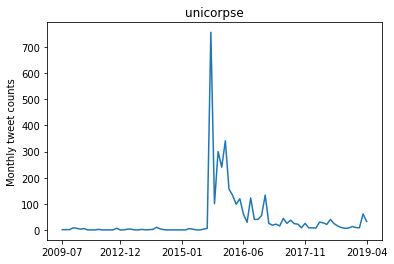

In [0]:
plot_monthly_timeseries(tweet['unicorpse'], 'unicorpse')

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

norm_ts = {}
NUM_DATA_PT = 100
SMOOTH_FACTOR = 0.5
def normalize_timeseries(ts):
  max_val = np.max(ts)
  return ts/max_val

def smooth_ts(ts, param = 0.5):
  ts = plot_monthly_timeseries(tweet[word], word, return_ts = True)
  original_smoo = SimpleExpSmoothing(ts).fit(smoothing_level=param,optimized=False)
  return original_smoo.fittedvalues

def build_normalized_ts(df, word):
  ## use cut to have horizonally normalized entries
  ## expamd to daily first:
  df['time_bin'] = pd.cut(df.timestamp, NUM_DATA_PT)
  ts = df.groupby(['time_bin']).text.count().reset_index().text
  ts2 = smooth_ts(ts, SMOOTH_FACTOR)
  ts3 = normalize_timeseries(ts)
  norm_ts[word] = ts3
  return

In [143]:
for w in word_ls:
  build_normalized_ts(tweet[w], w)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [0]:
def compare_smoothing(word, param):
  
  ## original ts
  ts = plot_monthly_timeseries(tweet[word], word, return_ts = True)
  original_smoo = ExponentialSmoothing(ts).fit(smoothing_level=param,optimized=False)
  plt.plot(original_smoo.fittedvalues, color = 'red')
  plt.plot(ts)
  plt.show()
  ## comparing normalized ts
  norm_smoo = SimpleExpSmoothing(norm_ts[word]).fit(smoothing_level=param,optimized=False)
  plt.plot(norm_smoo.fittedvalues, color='red')
  plt.plot(norm_ts[word])
  plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


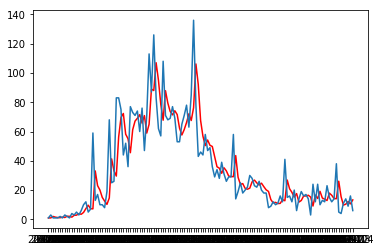

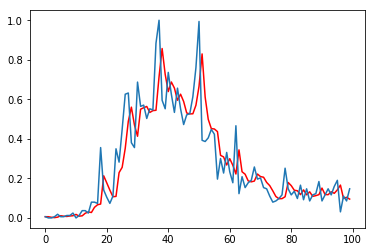

In [0]:
compare_smoothing('hasbian', 0.5)

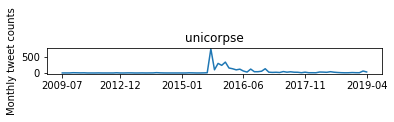

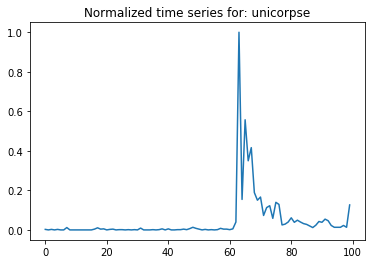

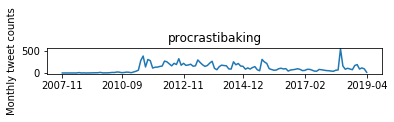

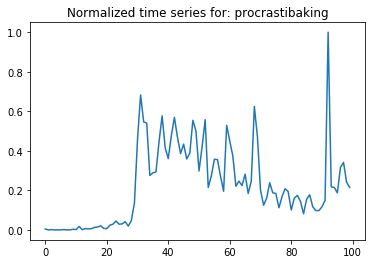

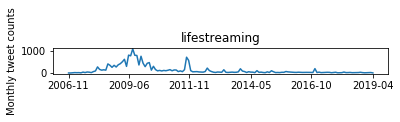

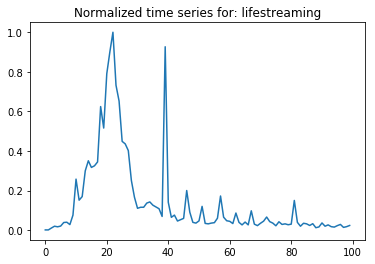

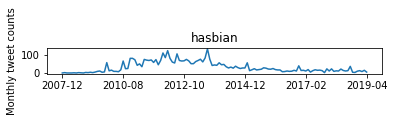

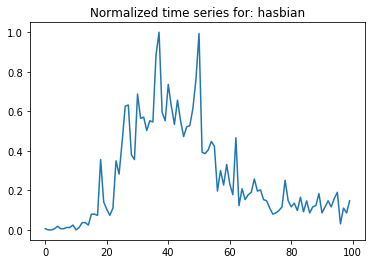

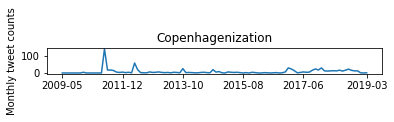

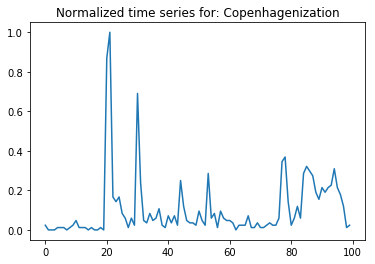

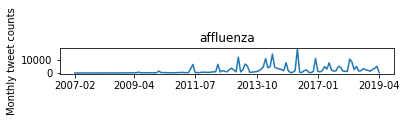

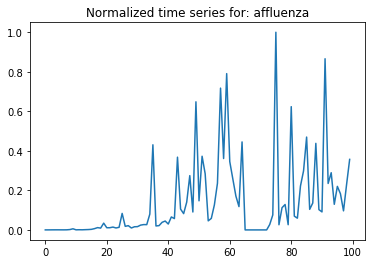

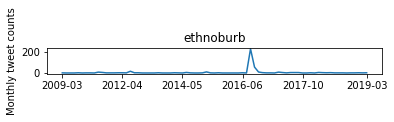

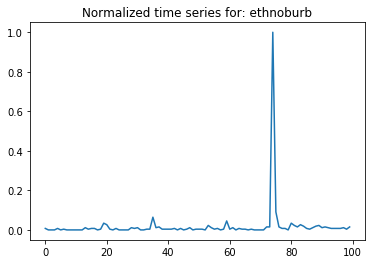

In [0]:
plot_ls = ['unicorpse', 'procrastibaking', 'lifestreaming','hasbian', 'Copenhagenization','affluenza', 'ethnoburb']#, 'photobomb']
for i, word in enumerate(plot_ls):
  plt.subplot(len(plot_ls), 1, i+1)
  plot_monthly_timeseries(tweet[word], word)
  plt.plot(norm_ts[word])
  plt.title('Normalized time series for: ' + word )
  plt.show()

In [0]:
def build_clustering_df(ts_dict):
  df = pd.concat(ts_dict, axis = 1)
  return df.T

In [0]:
norm_ts_df = build_clustering_df(norm_ts)

In [159]:
norm_ts_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Copenhagenization,0.023810,0.000000,0.000000,0.000000,0.011905,0.011905,0.011905,0.000000,0.011905,0.023810,...,0.214286,0.190476,0.214286,0.226190,0.309524,0.214286,0.178571,0.119048,0.011905,0.023810
Rendezbooze,0.015625,0.011719,0.003906,0.000000,0.003906,0.007812,0.007812,0.003906,0.000000,0.000000,...,0.023438,0.019531,0.035156,0.023438,0.031250,0.031250,0.019531,0.023438,0.015625,0.050781
affluenza,0.000105,0.000158,0.000316,0.000421,0.000473,0.000368,0.000316,0.000526,0.001789,0.005682,...,0.091115,0.865958,0.235047,0.289337,0.129518,0.220264,0.183019,0.096428,0.229838,0.356778
egocasting,0.013605,0.006803,0.000000,0.000000,0.006803,0.013605,0.027211,0.006803,0.020408,0.000000,...,0.081633,0.040816,0.006803,0.013605,0.047619,0.047619,0.034014,0.020408,0.000000,0.013605
ethnoburb,0.007576,0.000000,0.000000,0.000000,0.007576,0.000000,0.003788,0.000000,0.000000,0.000000,...,0.011364,0.015152,0.011364,0.007576,0.007576,0.007576,0.007576,0.011364,0.003788,0.015152
feardom,0.001961,0.000000,0.000000,0.000000,0.000000,0.001961,0.001961,0.005882,0.001961,0.003922,...,0.013725,0.019608,0.013725,0.025490,0.060784,0.031373,0.023529,0.027451,0.021569,0.029412
genopolitics,0.000054,0.000054,0.000054,0.000000,0.000054,0.000162,0.000054,0.000108,0.000971,0.000270,...,0.202728,0.299617,0.215021,0.530436,0.238260,0.273144,0.253302,0.430366,0.834852,0.790802
grasstops,0.012195,0.000000,0.012195,0.000000,0.000000,0.000000,0.024390,0.085366,0.036585,0.036585,...,0.341463,0.500000,0.365854,0.207317,0.292683,0.365854,0.390244,0.158537,0.634146,0.634146
hasbian,0.006135,0.000000,0.000000,0.006135,0.018405,0.006135,0.006135,0.012270,0.012270,0.024540,...,0.085890,0.116564,0.147239,0.116564,0.159509,0.190184,0.030675,0.110429,0.085890,0.147239
hipsterification,0.001795,0.000000,0.000000,0.001795,0.000898,0.001795,0.000898,0.000898,0.003591,0.001795,...,0.008079,0.008079,0.004488,0.005386,0.009874,0.002693,0.003591,0.005386,0.008977,0.013465


In [0]:
#word_ls = [x[0] for x in neo_scraped[:smallest_k]] ## read the k files with the smallest memory
#word_ls.remove('affluenza (1)')
word_ls

['one-upper',
 'elderburb',
 'one-up',
 'Rendezbooze',
 'hundo',
 'ethnoburb',
 'Copenhagenization',
 'egocasting',
 'grasstops',
 'feardom',
 'hipsterification',
 'hasbian',
 'unicorpse',
 'micropolitan',
 'procrastibaking',
 'lifestreaming',
 'woonerf',
 'walkscore',
 'ninja_sex',
 'party_foul',
 'affluenza',
 'man_boobs',
 'jailbait',
 'genopolitics']

In [0]:
norm_ts_df2 = norm_ts_df.reset_index().drop(['index'], axis = 1).drop(index = [0,1,2])
del word_ls[0:3]

In [0]:
model.labels_

array([3, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 4, 1, 0, 4, 4, 1], dtype=int32)

In [0]:
def plot_cluster_visual(model, norm_ts_df, k, i):
  #word_cluster = []
  for label, centroid in enumerate(model.cluster_centers_):
    plt.subplot(5, 1, label+1)
    plt.plot(centroid, 'r')
    membership = []
    for ts_id in range(norm_ts_df.shape[0]):
      
      if model.labels_[ts_id] == label:
        membership.append(word_ls[ts_id])
        
        #word_cluster.append(membership)
        
        plt.plot(norm_ts_df.iloc[ts_id], alpha = 0.3) #'b', alpha = 0.3)  
        plt.subplots_adjust(top = 3)
    plt.title(membership)
    plt.ylabel("Relative Frequency")
    #plt.margins(y = 10)
    print()
  #print(word_cluster)
  plt.xlabel('Normalized Time Interval')
  plt.show()

######## Given 2 cluster:




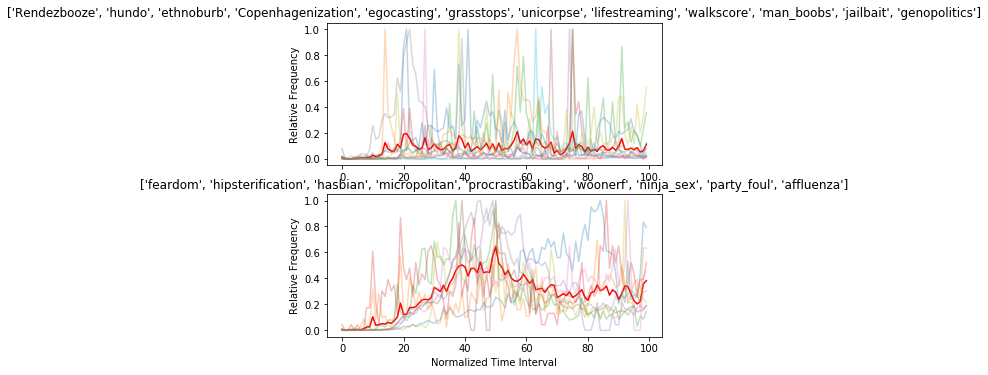

######## Given 3 cluster:





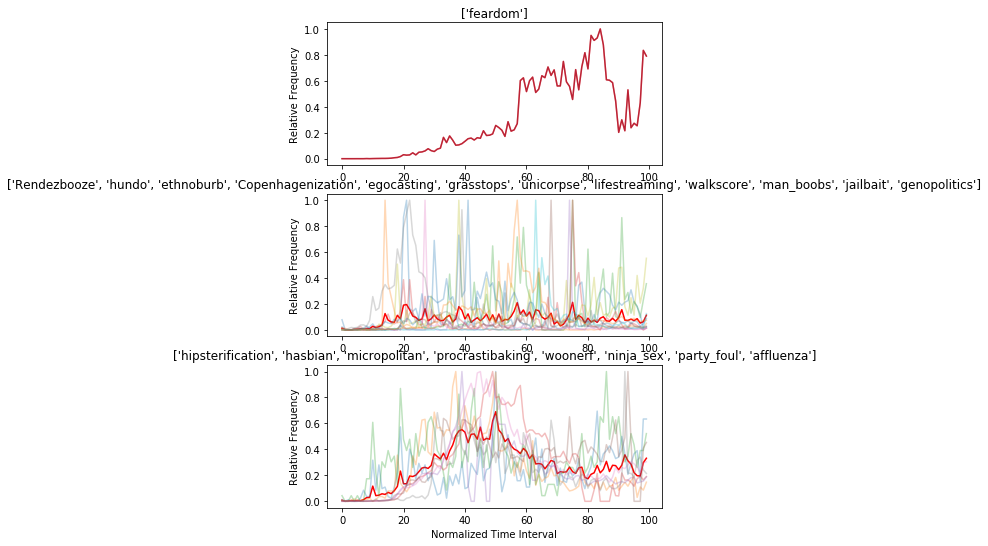

######## Given 4 cluster:






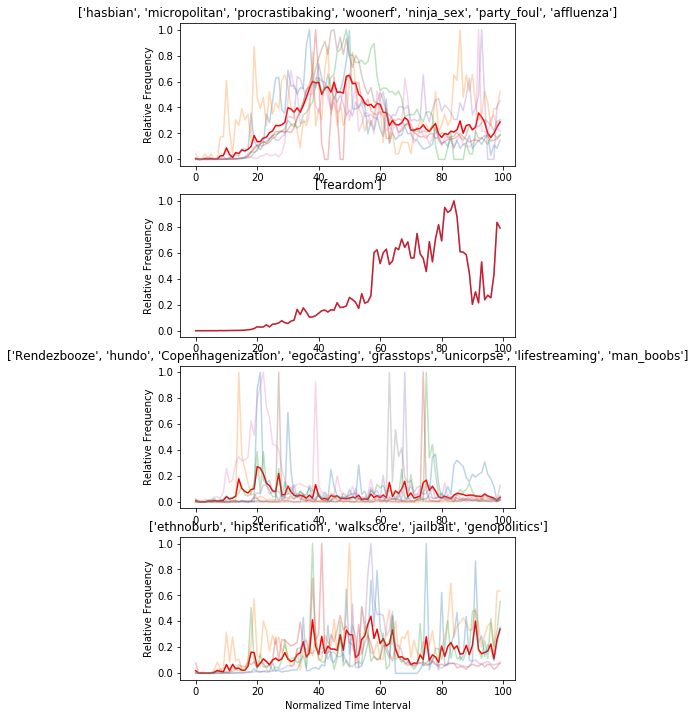

######## Given 5 cluster:







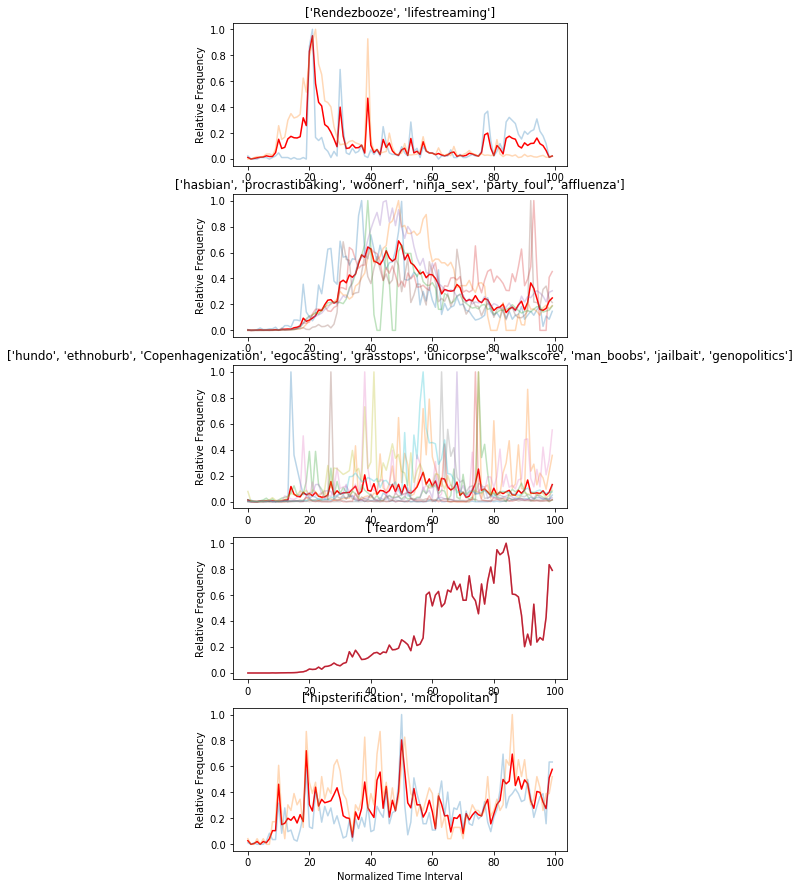

In [163]:
from sklearn.cluster import KMeans
models = []
i = 1
for k in [2,3,4,5]:
  
  model = KMeans(n_clusters=k, random_state=0).fit(norm_ts_df)
  print("######## Given %d cluster:" % k)
  plot_cluster_visual(model, norm_ts_df, k, i)
  models.append(model)
  i +=1

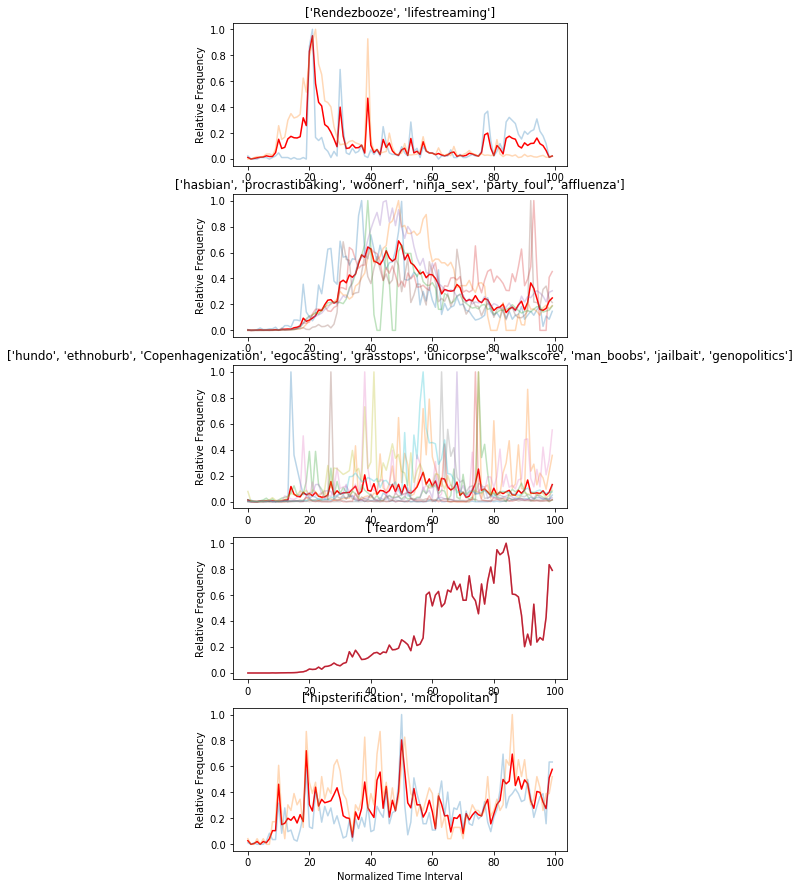

In [168]:
plot_cluster_visual(models[3], norm_ts_df, 2, 5)

In [165]:
models[0].inertia_


55.91803944634805

In [0]:
dataset_read.head()

NameError: ignored